In [72]:
import h5py 

# 获得坐标

In [ ]:
from pyproj import Proj,transform
import math

def WGS84_CGCS2000(lon,lat,degree_type,is_zone_number):

    '''
    :param lon: 经度
    :param lat: 纬度
    :param degree_type:3度带或者6度带
    :param is_zone_number: 生成坐标是否包含带号
    :return:
    '''

    if int(lon)<75 or int(lon)>135:
        print('该区域不在中国境内')
    else:
        if degree_type==3:
            if is_zone_number==True:
                zone=math.floor( (lon-1.5)/3 )+1
                Epsg_test='45{0}'.format(str(zone-12) )
                p1 = Proj(init='epsg:4326')
                p2 = Proj(init='epsg:{0}'.format(Epsg_test))
                x, y = p1(lon,lat)
                x_prj, y_prj = transform(p1, p2, x, y)
                x_prj=int(x_prj)
                y_prj=int(y_prj)

            elif is_zone_number==False:
                zone=math.floor( (lon-1.5)/3 )+1
                Epsg_test = '45{0}'.format(str(zone+9))
                p1 = Proj(init='epsg:4326')
                p2 = Proj(init='epsg:{0}'.format(Epsg_test))
                x, y = p1(lon,lat)
                x_prj, y_prj = transform(p1, p2, x, y)
                x_prj=int(x_prj)
                y_prj=int(y_prj)

        elif degree_type==6:

            if is_zone_number==True:
                zone=math.floor(lon/6)+1
                epsg=str(4490+zone-12)
                p1 = Proj(init='epsg:4326')
                p2 = Proj(init='epsg:{0}'.format(epsg))
                x, y = p1(lon,lat)
                x_prj, y_prj = transform(p1, p2, x, y)
                x_prj=int(x_prj)
                y_prj=int(y_prj)

            elif is_zone_number==False:

                zone = math.floor(lon / 6) + 1
                epsg=4500+zone-11
                p1 = Proj(init='epsg:4326')
                p2 = Proj(init='epsg:{0}'.format(epsg))
                x, y = p1(lon,lat)
                x_prj, y_prj = transform(p1, p2, x, y)
                x_prj=int(x_prj)
                y_prj=int(y_prj)

    return x_prj,y_prj

def CGCS2000_WGS84(X,Y):

    p = Proj(init='epsg:4528')
    lon,lat = p(X,Y,inverse=True)
    lon=round(lon,6)
    lat=round(lat,6)
    return lon,lat

if __name__=='__main__':
    X_DIFF = 40094019 
    Y_DIFF = 368
    x_2000, y_2000 = WGS84_CGCS2000(121.049864464,32.551416489, 3, is_zone_number=True)
    print("对应的网格坐标:", x_2000 - X_DIFF, y_2000 - Y_DIFF)
    # ID为0的坐标值
    x0 = 498149
    y0 = 3604810
    x_WGS84, y_WGS84 = CGCS2000_WGS84(x0 + X_DIFF, y0 + Y_DIFF)
    print("对应的WGS坐标:", x_WGS84, y_WGS84)

    # print(CGCS2000_WGS84(x_2000,y_2000))

In [95]:
xorigin = 498149
yorigin = 3594250

## 输入【基本变量】

In [74]:
NROW = 213
NCOL = 283
NLAY = 4
sim_name_ini = "2022.10.20-FJMFQF"
sim_ws_ini = "2022.10.20-FJMFQF_MODFLOW"

## 破解 h5、并读取边界水头chd、初始水头starthead、边界ibound

In [75]:
import h5py 
import numpy as np

f1 = h5py.File("/home/nandahgy/yqc_model/" + sim_ws_ini + "/" + sim_name_ini + ".h5",'r')

In [76]:
f2 = h5py.File("/home/nandahgy/yqc_model/" + sim_ws_ini + "/" + sim_name_ini + ".hed.h5",'r')

In [77]:
nums = list(f2['Datasets']['Head']['Values'][0])
tmp2 = []
for j in range(NLAY):
      tmp = []
      for i in range(NROW):
            tmp.append(nums[i*NCOL:(1+i)*NCOL])
      tmp2.append(tmp)
chd = np.array(tmp2)
# 输出测试
# chd[0,98,29]

In [78]:
nums = [0] * (NROW * NCOL)
idomain = np.ones((NLAY, NROW, NCOL), dtype = int) # 参与模拟的区域，1 为参与
for layi in range(NLAY):
  iboundname = 'ibound' + str(layi + 1)
  nums = list(f1['Arrays'][iboundname])
  tmp = []
  for rowi in range(NROW):
    tmp.append(nums[rowi * NCOL:(1 + rowi) * NCOL])
  idomain[layi,:,:] = np.array(tmp)

print(idomain[0,100,100])
print(idomain[1,100,100])
print(idomain[2,100,100])
print(idomain[3,100,100])

1
1
1
1


In [79]:

# 初始条件: # Initial conditions
# Starting concentrations 初始浓度
sconc = 0.0
# Starting Heads 初始水头
nums = [0] * (NROW * NCOL)
strt = np.zeros((NLAY, NROW, NCOL), dtype=float)

for layi in range(NLAY):
  StartHeadname = 'StartHead' + str(layi + 1)
  nums = list(f1['Arrays'][StartHeadname])
  tmp = []
  for rowi in range(NROW):
    tmp.append(nums[rowi * NCOL:(1 + rowi) * NCOL])
  strt[layi,:,:] = np.array(tmp)

print(strt[0,100,100])
print(strt[1,100,100])
print(strt[2,100,100])
print(strt[3,100,100])

5.0
-2.0
-18.0
-35.0


In [80]:
nums = list(f1['Arrays']['top1'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
top1 = np.array(tmp)

nums = list(f1['Arrays']['bot1'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
bot1 = np.array(tmp)

nums = list(f1['Arrays']['bot2'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
bot2 = np.array(tmp)

nums = list(f1['Arrays']['bot3'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
bot3 = np.array(tmp)

nums = list(f1['Arrays']['bot4'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
bot4 = np.array(tmp)

print("top1:",top1[100,100])
print("bot1:",bot1[100,100])
print("bot2:",bot2[100,100])
print("bot3:",bot3[100,100])
print("bot4:",bot4[100,100])

top1: 5.0
bot1: -2.0
bot2: -18.0
bot3: -35.0
bot4: -75.06968688964844


In [81]:

nums = list(f1['Arrays']['HK1'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HK1 = np.array(tmp)

nums = list(f1['Arrays']['HK2'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HK2 = np.array(tmp)

nums = list(f1['Arrays']['HK3'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HK3 = np.array(tmp)

nums = list(f1['Arrays']['HK4'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HK4 = np.array(tmp)

nums = list(f1['Arrays']['HANI1'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HANI1 = np.array(tmp)

nums = list(f1['Arrays']['HANI2'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HANI2 = np.array(tmp)

nums = list(f1['Arrays']['HANI3'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HANI3 = np.array(tmp)

nums = list(f1['Arrays']['HANI4'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
HANI4 = np.array(tmp)

nums = list(f1['Arrays']['VANI1'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
VANI1 = np.array(tmp)

nums = list(f1['Arrays']['VANI2'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
VANI2 = np.array(tmp)

nums = list(f1['Arrays']['VANI3'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
VANI3 = np.array(tmp)

nums = list(f1['Arrays']['VANI4'])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
VANI4 = np.array(tmp)

print("HK1:",HK1[100,100])
print("HK2:",HK2[100,100])
print("HK3:",HK3[100,100])
print("HK4:",HK4[100,100])
print("HANI 和 VANI 都是比值")
print("HANI1:",HANI1[100,100])
print("HANI2:",HANI2[100,100])
print("HANI3:",HANI3[100,100])
print("HANI4:",HANI4[100,100])
print("VANI1:",VANI1[100,100])
print("VANI2:",VANI2[100,100])
print("VANI3:",VANI3[100,100])
print("VANI4:",VANI4[100,100])

HK1: 3.6
HK2: 3.6
HK3: 0.0001
HK4: 4.4
HANI 和 VANI 都是比值
HANI1: 1.0
HANI2: 1.0
HANI3: 1.0
HANI4: 1.0
VANI1: 3.0
VANI2: 3.0
VANI3: 3.0
VANI4: 3.0


In [82]:
nums = list(f1['Recharge']['07. Property'][0,:,0])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
rch = np.array(tmp)

nums = list(f1['ET']['07. Property'][0,:,0])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
et_surf = np.array(tmp)

nums = list(f1['ET']['07. Property'][1,:,0])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
et_rat = np.array(tmp)

nums = list(f1['ET']['07. Property'][2,:,0])
tmp = []
for i in range(NROW):
  tmp.append(nums[i*NCOL:(1+i)*NCOL])
et_dep = np.array(tmp)

print("rch:",rch[100,100])
print("et_surf:",et_surf[100,100])
print("et_rat:",et_rat[100,100])
print("et_dep:",et_dep[100,100])

rch: 0.000132
et_surf: 3.0
et_rat: 0.000141
et_dep: 10.0


## 绘制二维图plot

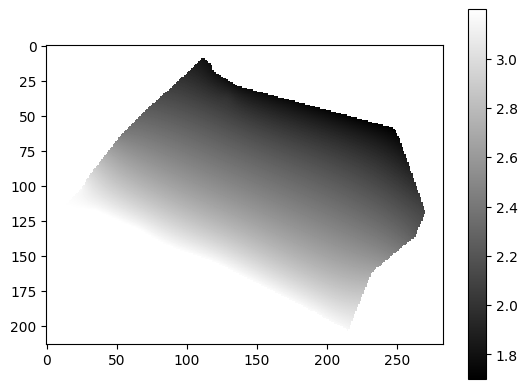

In [83]:
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy.ma as npm

mask = chd < 0
arrmask = npm.array(chd, mask=mask)

plt.imshow(arrmask[3], cmap=cm.gray)
plt.colorbar()
plt.show()

# 基于mf6的溶质运移模型(再试一遍)

https://zhuanlan.zhihu.com/p/532012679

In [84]:
# Filename
sim_ws = 'simulation_1024_A'
sim_name = 'model'          # 模拟总名称
gwfname = "gwf_" + sim_name # 渗流模型名称
gwtname = "gwt_" + sim_name # 溶质运移模型名称

In [85]:
# Units
length_units = "meters"   # 长度单位
time_units = "days"       # 时间单位

## 离散层数

In [86]:
# Discretization
import numpy as np
nper = 1                  # 稳定流，周期数为 1
nlay = NLAY                  # 层数
nrow = NROW                 # 行数
ncol = NCOL                 # 列数
delr = 49.84594               # 单位行长，在out文件内部
delc = 49.82019               # 单位列长，在out文件内部
# delz = 10.0               # 单位层高
Lx = delr * nrow
Ly = delc * ncol
top = 5.0                 # 顶部高程
botm = [bot1[100,100],bot2[100,100],bot3[100,100],bot4[100,100]]


In [87]:
botm

[-2.0, -18.0, -35.0, -75.06968688964844]

## 渗透系数

In [88]:
# 设置溶质运移模型专门参数:
# GWT
porosity = 0.2
al = 20.0                    # 纵向弥散系数
trpt = 0.3; ath1 = al * trpt # 横向弥散系数
trpv = 0.3; atv = al * trpv  # 垂直弥散系数

# 设置渗流模型专门参数:

# GWF
icelltype = [0, 0, 0, 0] # 饱和 or 非饱和
k11 = [HK1[100,100], HK2[100,100], HK3[100,100], HK4[100,100]]
# k22overk = HANI1[100,100]
# k33overk = VANI1[100,100]
k33 = k11
# icelltype = 0
# k11 = 0.5

In [89]:
# 时间离散化参数:
# Temporal discretization
perlen = 100.0
nstp = 10
tsmult = 1.0
tdis_ds = []
tdis_ds.append((perlen, nstp, tsmult),)
print(tdis_ds)

# 求解器参数：
# Solver parameters
nouter, ninner = 100, 300
hclose, rclose, relax = 1e-6, 1e-6, 1.0

[(100.0, 10, 1.0)]


In [90]:
# 初始条件: # Initial conditions
# Starting concentrations 初始浓度
sconc = 0.0
# Starting Heads 初始水头


## 井

In [91]:
# 边界条件: # Boundary conditions
# wel_spd 井
qwell = 0
cwell = 100.0
wel_loc = (2, 100, 100)
#               (k, i, j),  flow,  conc
wel_spd = {0: [[wel_loc, qwell, cwell]]}


## 边界水头chd的指定要非常注意，容易不收敛

以下2个代码块只需要跑一个

In [92]:
# chd_spd = []
# cnt = 0
# for k in np.arange(nlay): # 东西两侧分别指定
#     for j in np.arange(ncol): # 南北两侧分别指定
#         for i in np.arange(nrow):
#             if idomain[k][i][j] == 1:
#               chd_spd.append([(k, i, j), chd[k, i, j], 100.0]) #(l, r, c),head, conc
#               cnt += 1
#               break
#         for i in np.arange(nrow-1,-1,-1):
#             if idomain[k][i][j] == 1:
#               chd_spd.append([(k, i, j), chd[k, i, j], 100.0]) #(l, r, c),head, conc
#               cnt += 1
#               break
# chd_spd = {0: chd_spd}
# cnt

In [93]:
chd_spd = []
cnt = 0
for k in np.arange(nlay): # 东西两侧分别指定
    for i in np.arange(nrow):
        for j in np.arange(ncol): # 南北两侧分别指定
            if idomain[k][i][j] == 1:
              chd_spd.append([(k, i, j), chd[k, i, j], 100.0])  #(l, r, c),head, conc
              cnt += 1
              break
        for j in np.arange(ncol-1,-1,-1): # 南北两侧分别指定
            if idomain[k][i][j] == 1:
              chd_spd.append([(k, i, j), chd[k, i, j], 100.0])  #(l, r, c),head, conc
              break
chd_spd = {0: chd_spd}
cnt

768

## 建模并计算

In [96]:
import flopy
def build_model():
    sim = flopy.mf6.MFSimulation(
        sim_name=sim_name, sim_ws=sim_ws, exe_name='/usr/local/lib/modflow/mf6'
    )
    print("sim_name:",sim_name)
    print("sim_ws:",sim_ws)

    # 时间离散化
    flopy.mf6.ModflowTdis(
        sim, nper=nper, perioddata=tdis_ds, time_units=time_units
    )

    # GWF
    gwf = flopy.mf6.ModflowGwf(
        sim,
        modelname=gwfname,
        save_flows=True,
        model_nam_file="{}.nam".format(gwfname),
    )
    print("gwfname:",gwfname)

    # 渗流模型求解参数
    imsgwf = flopy.mf6.ModflowIms(
        sim,
        print_option="SUMMARY",
        outer_dvclose=hclose,
        outer_maximum=nouter,
        under_relaxation="NONE",
        inner_maximum=ninner,
        inner_dvclose=hclose,
        rcloserecord=rclose,
        linear_acceleration="CG",
        scaling_method="NONE",
        reordering_method="NONE",
        relaxation_factor=relax,
        filename="{}.ims".format(gwfname),
    )
    sim.register_ims_package(imsgwf, [gwf.name])

    # 离散化
    dis6 = flopy.mf6.ModflowGwfdis(
        gwf,
        length_units=length_units,
        xorigin=xorigin,
        yorigin=yorigin,
        nlay=nlay,
        nrow=nrow,
        ncol=ncol,
        delr=delr,
        delc=delc,
        top=top,
        botm=botm,
        idomain=idomain,
        filename="{}.dis".format(gwfname),
    )
    print("nlay:",nlay)
    print("nrow:",nrow)
    print("ncol:",ncol)
    print("delr:",delr)
    print("delc:",delc)
    print("top:",top)
    print("botm:",botm)

    # 含水层特性
    flopy.mf6.ModflowGwfnpf(
        gwf,
        save_flows=False,
        icelltype=icelltype,
        k=k11,
        # k22=1.0,
        # k22overk=k22overk,
        # k33overk=k33overk,
        k33=k33,
        save_specific_discharge=True,
        filename="{}.npf".format(gwfname),
    )
    print("icelltype:",icelltype)
    print("k11:",k11)
    print("k33:",k33)
    

    # 初始水头
    flopy.mf6.ModflowGwfic(
        gwf, strt=strt, filename="{}.ic".format(gwfname)
    )
    print("strt:",strt[0,100,100])
    print("strt:",strt[1,100,100])
    print("strt:",strt[2,100,100])
    print("strt:",strt[3,100,100])

    # 指定水头边界
    flopy.mf6.ModflowGwfchd(
        gwf,
        maxbound=len(chd_spd),
        stress_period_data=chd_spd,
        save_flows=False,
        auxiliary="CONCENTRATION",
        pname="CHD-1",
        filename="{}.chd".format(gwfname),
    )
    print("chd_spd:",chd_spd[0][:10])


    # 井边界
    flopy.mf6.ModflowGwfwel(
        gwf,
        print_input=True,
        print_flows=True,
        stress_period_data=wel_spd,
        save_flows=False,
        auxiliary="CONCENTRATION",
        pname="WEL-1",
        filename="{}.wel".format(gwfname),
    )
    print("wel_spd:",wel_spd)

    # 补给recharge
    flopy.mf6.ModflowGwfrcha(
        gwf,
        recharge=rch[100,100],
        filename="{}.rch".format(gwfname),
    )
    print("rch:",rch[100,100])

    # 蒸发
    flopy.mf6.ModflowGwfevta(
        gwf,
        surface=et_surf[100,100],
        rate=et_rat[100,100],
        depth=et_dep[100,100],
        filename="{}.evt".format(gwfname),
    )
    print("et_surf:",et_surf[100,100])
    print("et_rat:",et_rat[100,100])
    print("et_dep:",et_dep[100,100])

    # 输出控制
    flopy.mf6.ModflowGwfoc(
        gwf,
        head_filerecord="{}.hds".format(gwfname),
        budget_filerecord="{}.bud".format(gwfname),
        headprintrecord=[
            ("COLUMNS", 100, "WIDTH", 150, "DIGITS", 6, "GENERAL")
        ],
        saverecord=[("HEAD", "ALL"), ("BUDGET", "ALL")],
        printrecord=[("HEAD", "ALL"), ("BUDGET", "ALL")],
    )

    # GWT
    gwt = flopy.mf6.ModflowGwt(
        sim,
        modelname=gwtname,
        save_flows=True,
        model_nam_file="{}.nam".format(gwtname),
    )

    # 溶质运移模型求解参数
    imsgwt = flopy.mf6.ModflowIms(
        sim,
        print_option="SUMMARY",
        outer_dvclose=hclose,
        outer_maximum=nouter,
        under_relaxation="NONE",
        inner_maximum=ninner,
        inner_dvclose=hclose,
        rcloserecord=rclose,
        linear_acceleration="BICGSTAB",
        scaling_method="NONE",
        reordering_method="NONE",
        relaxation_factor=relax,
        filename="{}.ims".format(gwtname),
    )
    sim.register_ims_package(imsgwt, [gwt.name])

    # 离散化
    flopy.mf6.ModflowGwtdis(
        gwt,
        nlay=nlay,
        nrow=nrow,
        ncol=ncol,
        delr=delr,
        delc=delc,
        top=top,
        botm=botm,
        idomain=idomain,
        filename="{}.dis".format(gwtname),
    )

    # 初始浓度
    flopy.mf6.ModflowGwtic(
        gwt, strt=sconc, filename="{}.ic".format(gwtname)
    )

    # 对流
    flopy.mf6.ModflowGwtadv(
        gwt, scheme="UPSTREAM", filename="{}.adv".format(gwtname)
    )

    # 弥散
    flopy.mf6.ModflowGwtdsp(
        gwt,
        alh=al,
        ath1=ath1,
        atv=atv,
        filename="{}.dsp".format(gwtname),
    )

    # 化学反应 (等同于 MT3DMS 的 reaction)
    flopy.mf6.ModflowGwtmst(
        gwt,
        porosity=porosity,
        first_order_decay=False,
        decay=None,
        decay_sorbed=None,
        sorption=None,
        bulk_density=None,
        distcoef=None,
        filename="{}.mst".format(gwtname),
    )

    # 源汇项
    sourcerecarray = [
        ("WEL-1", "AUX", "CONCENTRATION"),
        ("CHD-1", "AUX", "CONCENTRATION"),
    ]
    flopy.mf6.ModflowGwtssm(
        gwt, sources=sourcerecarray, filename="{}.ssm".format(gwtname)
    )

    # 输出控制
    flopy.mf6.ModflowGwtoc(
        gwt,
        budget_filerecord="{}.cbc".format(gwtname),
        concentration_filerecord="{}.ucn".format(gwtname),
        concentrationprintrecord=[
            ("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")
        ],
        saverecord=[("CONCENTRATION", "ALL"), ("BUDGET", "ALL")],
        printrecord=[("CONCENTRATION", "ALL"), ("BUDGET", "ALL")],
    )

    # GWF 和 GWT 之间的交换
    flopy.mf6.ModflowGwfgwt(
        sim,
        exgtype="GWF6-GWT6",
        exgmnamea=gwfname,
        exgmnameb=gwtname,
        filename="{}.gwfgwt".format(sim_name),
    )
    return sim, gwf, gwt, dis6

sim, gwf, gwt, dis6 = build_model()
sim.write_simulation(silent = True)

success, buff = sim.run_simulation(silent = True)
if not success:
    raise Exception("MODFLOW 6 did not terminate normally.")

sim_name: model
sim_ws: simulation_1024_A
gwfname: gwf_model
nlay: 4
nrow: 213
ncol: 283
delr: 49.84594
delc: 49.82019
top: 5.0
botm: [-2.0, -18.0, -35.0, -75.06968688964844]
icelltype: [0, 0, 0, 0]
k11: [3.6, 3.6, 0.0001, 4.4]
k33: [3.6, 3.6, 0.0001, 4.4]
strt: 5.0
strt: -2.0
strt: -18.0
strt: -35.0
chd_spd: [[(0, 10, 111), 1.819839, 100.0], [(0, 10, 112), 1.8110753, 100.0], [(0, 11, 110), 1.8322532, 100.0], [(0, 11, 113), 1.8076414, 100.0], [(0, 12, 109), 1.8448678, 100.0], [(0, 12, 114), 1.8065386, 100.0], [(0, 13, 108), 1.8573862, 100.0], [(0, 13, 116), 1.8015115, 100.0], [(0, 14, 107), 1.869854, 100.0], [(0, 14, 116), 1.8054472, 100.0]]
wel_spd: {0: [[(2, 100, 100), 0, 100.0]]}
rch: 0.000132
et_surf: 3.0
et_rat: 0.000141
et_dep: 10.0


## 查看结果

In [97]:
# 运行完毕后，分别读取水头和浓度结果（我们使用 get_alldata 读取了全部时刻的结果）:

head = gwf.oc.output.head().get_alldata()
concentration = gwt.oc.output.concentration().get_alldata()

# 我们可以查看结果的维度:

print(head.shape)
print(concentration.shape)

# 10: 时间 - nstp 值。
# (8, 15, 21): 网格空间

(10, 4, 213, 283)
(10, 4, 213, 283)


## 绘图 flopy.plot.PlotMapView

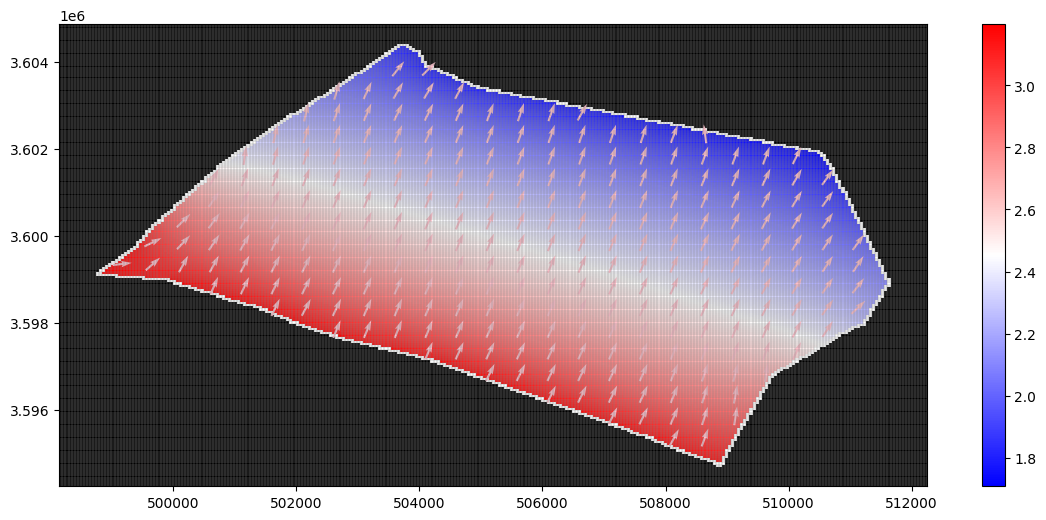

In [109]:
import matplotlib.pyplot as plt
def plot_results(model, result):
    fig = plt.figure(figsize = (14, 6))
    ax = fig.add_subplot(1, 1, 1)
    pmv = flopy.plot.PlotMapView(model = model, ax = ax, layer = 0)
    pmv.plot_grid(ax = ax, color = ".5", alpha = 0.2) # 绘制网格
    
    # 网格填充颜色
    plot_array = pmv.plot_array(head[9,0], masked_values = [1e30], cmap = 'bwr')
    plt.colorbar(plot_array)
    
    # 绘制等值线
    plot_contour_array = pmv.contour_array(result, masked_values = [1e30], cmap = "brg", linestyles="--")
    plt.clabel(plot_contour_array, fmt = r'%.2f') # 绘制等值线上文本标注
    # plt.colorbar(plot_contour_array)              # 等值线图例
    
    pmv.plot_bc(package = gwf.get_package("WEL-1"), color = 'green')
    pmv.plot_inactive(ibound = gwf.modelgrid.idomain, color_noflow = 'black')
    
    # 绘制水流的方向 (粉红色箭头)
    spdis = gwf.oc.output.budget().get_data(text = 'DATA-SPDIS')[0]
    qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)
    pmv.plot_vector(qx, qy, normalize = True, istep = 10, jstep = 10, color = "pink")
    
plot_results(model = gwf, result = head[9,0])

# Folium

In [145]:
import numpy as np
import pandas as pd
import folium
import webbrowser
from folium.plugins import HeatMap
 
 
# # 读取csv文件,以Dataframe形式保存
# df = pd.read_csv("/home/nandahgy/坐标test.csv")
# print(df)
# # 获取数据个数
# num = df.shape[0]
# print(num)
# # 获取纬度
# lat = np.array(df["lat"][0:num])
# print(lat)
# # 获取经度
# lon = np.array(df["lon"][0:num])
# print(lon)
# # 获取PM2.5，转化为numpy浮点型
# pm25 = np.array(df["Head"][0:num], dtype=float)
# print(pm25)
# # 将数据制作成[lats, lons, weights]的形式
# data1 = [[lat[i], lon[i], pm25[i]] for i in range(num)]
# # 绘制Map，中心经纬度[32, 120],开始缩放程度是5倍
# map_osm = folium.Map(location=[32.55141649, 121.0498645], zoom_start=12)
# # 将热力图添加到前面建立的map里
# HeatMap(data1).add_to(map_osm)
 
# file_path = "/home/nandahgy/AirQualityMap.html"
# # 保存为html文件
# map_osm.save(file_path)
# # 默认浏览器打开
# webbrowser.open(file_path)

          lon        lat  Head
0  121.049864  32.551416     5
1  120.981464  32.567225    10
2
[32.55141649 32.567225  ]
[121.0498645 120.981464 ]
[ 5. 10.]


False

In [160]:
print(gwf.modelgrid.xvertices.shape)
print(gwf.modelgrid.yvertices.shape)
print(head[9,0].shape)

(214, 284)
(214, 284)
(213, 283)


In [162]:
xvertice = gwf.modelgrid.xvertices
yvertice = gwf.modelgrid.yvertices


In [165]:
print(head[9,0])

[[1.e+30 1.e+30 1.e+30 ... 1.e+30 1.e+30 1.e+30]
 [1.e+30 1.e+30 1.e+30 ... 1.e+30 1.e+30 1.e+30]
 [1.e+30 1.e+30 1.e+30 ... 1.e+30 1.e+30 1.e+30]
 ...
 [1.e+30 1.e+30 1.e+30 ... 1.e+30 1.e+30 1.e+30]
 [1.e+30 1.e+30 1.e+30 ... 1.e+30 1.e+30 1.e+30]
 [1.e+30 1.e+30 1.e+30 ... 1.e+30 1.e+30 1.e+30]]


In [ ]:
import sys
import time
f=open("myprint.txt","w+")
sys.stdout=f

data1 = []
for i in range(0,nrow,3):
      for j in range(0,ncol,3):
            y0 = yvertice[i,j]
            x0 = xvertice[i,j]
            headGIS = head[9,0][i,j]
            if headGIS != 1e30:
                  x_WGS84, y_WGS84 = CGCS2000_WGS84(x0 + X_DIFF, y0 + Y_DIFF)
            data1.append([y_WGS84,x_WGS84,headGIS])
            
map_osm2 = folium.Map(location=[32.55141649, 121.0498645], zoom_start=12)
HeatMap(data1).add_to(map_osm2)
file_path = "/home/nandahgy/HeadGisMap.html"
# 保存为html文件
map_osm2.save(file_path)
# 默认浏览器打开
webbrowser.open(file_path)


# MODPATH7 Model

In [ ]:
# Define names for the MODPATH 7 simulations
mp_namea = sim_name + "a_mp"
mp_nameb = sim_name + "b_mp"

In [ ]:
pcoord = np.array(
    [
        [0.000, 0.125, 0.500],
        [0.000, 0.375, 0.500],
        [0.000, 0.625, 0.500],
        [0.000, 0.875, 0.500],
        [1.000, 0.125, 0.500],
        [1.000, 0.375, 0.500],
        [1.000, 0.625, 0.500],
        [1.000, 0.875, 0.500],
        [0.125, 0.000, 0.500],
        [0.375, 0.000, 0.500],
        [0.625, 0.000, 0.500],
        [0.875, 0.000, 0.500],
        [0.125, 1.000, 0.500],
        [0.375, 1.000, 0.500],
        [0.625, 1.000, 0.500],
        [0.875, 1.000, 0.500],
    ]
)
print("pcoord.shape[0]:",pcoord.shape[0])
# pcoord.shape[0]

nodew = (2, 100, 100)
plocs = [nodew for i in range(pcoord.shape[0])]
print("plocs:", plocs)
# create particle data
pa = flopy.modpath.ParticleData(
    plocs,
    structured=True,
    localx=pcoord[:, 0],
    localy=pcoord[:, 1],
    localz=pcoord[:, 2],
    drape=0,
)
print("pcoord[:, 0]:",pcoord[:, 0])
print("pcoord[:, 1]:",pcoord[:, 1])
print("pcoord[:, 2]:",pcoord[:, 2])

# create backward particle group
fpth = mp_namea + ".sloc"
pga = flopy.modpath.ParticleGroup(
    particlegroupname="BACKWARD1", particledata=pa, filename=fpth
)

pcoord.shape[0]: 16
plocs: [(2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100), (2, 100, 100)]
pcoord[:, 0]: [0.    0.    0.    0.    1.    1.    1.    1.    0.125 0.375 0.625 0.875
 0.125 0.375 0.625 0.875]
pcoord[:, 1]: [0.125 0.375 0.625 0.875 0.125 0.375 0.625 0.875 0.    0.    0.    0.
 1.    1.    1.    1.   ]
pcoord[:, 2]: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [ ]:
model_ws = sim_ws
# create modpath files
mp = flopy.modpath.Modpath7(
    modelname=mp_namea, flowmodel=gwf, exe_name="/usr/local/lib/modflow/mp7", model_ws=model_ws
)
flopy.modpath.Modpath7Bas(mp, porosity=porosity)
flopy.modpath.Modpath7Sim(
    mp,
    simulationtype="combined",
    trackingdirection="backward",
    weaksinkoption="pass_through",
    weaksourceoption="pass_through",
    referencetime=0.0,
    stoptimeoption="extend",
    timepointdata=[500, 1000.0],
    particlegroups=pga,
)

# write modpath datasets
mp.write_input()

# run modpath
mp.run_model()

FloPy is using the following executable to run the model: /usr/local/lib/modflow/mp7

MODPATH Version 7.2.001   
Program compiled Mar 08 2022 20:16:00 with IFORT compiler (ver. 20.21.5)        
 
 
Run particle tracking simulation ...
Processing Time Step     1 Period     1.  Time =  1.00000E+01  Steady-state flow                                                    

Particle Summary:
         0 particles are pending release.
         0 particles remain active.
         0 particles terminated at boundary faces.
         0 particles terminated at weak sink cells.
         0 particles terminated at weak source cells.
        16 particles terminated at strong source/sink cells.
         0 particles terminated in cells with a specified zone number.
         0 particles were stranded in inactive or dry cells.
         0 particles were unreleased.
         0 particles have an unknown status.
 
Normal termination.                                                        


(True, [])

加载pathline和timeseries数据

In [ ]:
import os

In [ ]:
import pandas

In [ ]:
fpth = os.path.join(model_ws, mp_namea + ".mppth")
p = flopy.utils.PathlineFile(fpth)
p0 = p.get_alldata()
fpth = os.path.join(model_ws, mp_namea + ".timeseries")
ts = flopy.utils.TimeseriesFile(fpth)
ts0 = ts.get_alldata()

In [ ]:
# 画出endpoint
fpth = os.path.join(model_ws, mp_namea + ".mpend")
e = flopy.utils.EndpointFile(fpth)
e0 = e.get_alldata()

## 画出endpoint

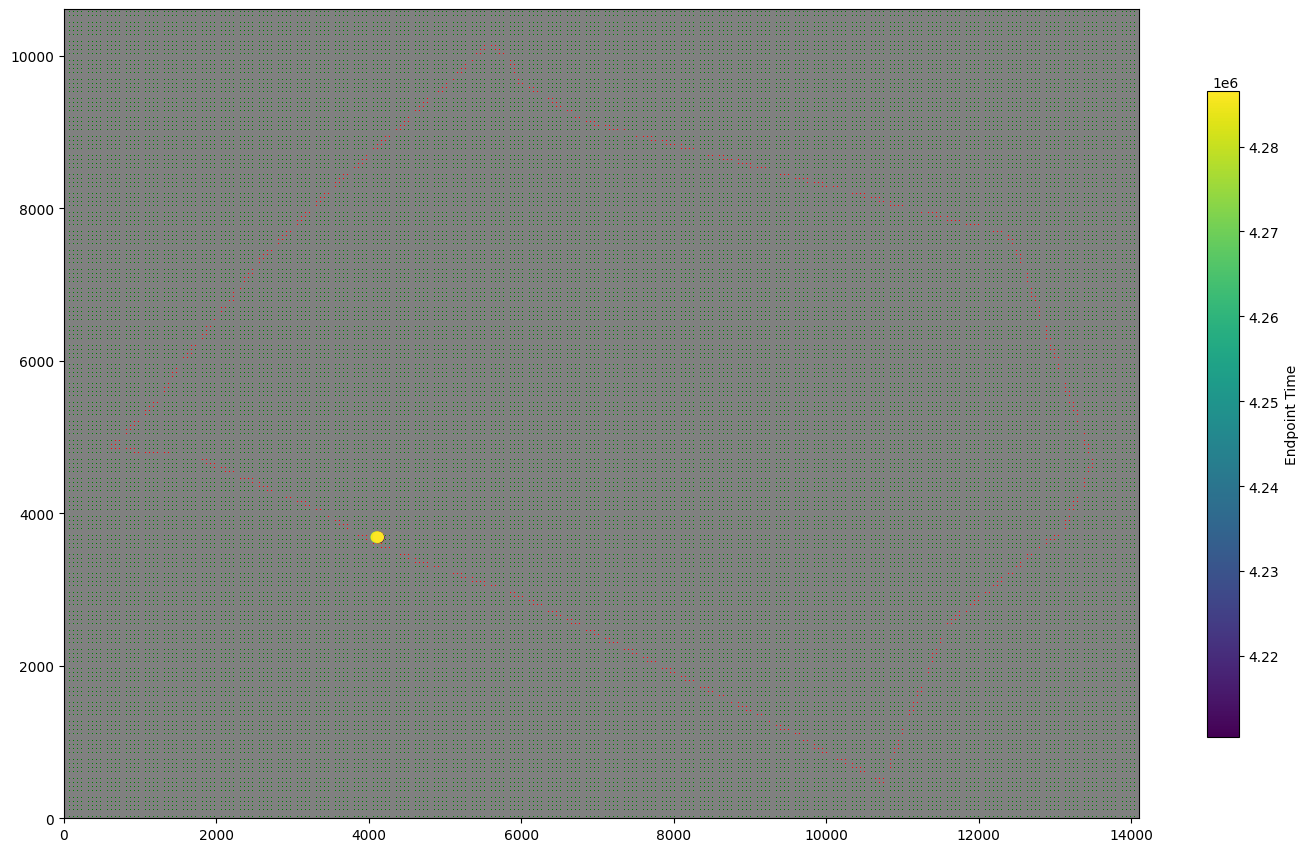

In [ ]:
import matplotlib as mpl
fig = plt.figure(figsize=(13, 13), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1, aspect="equal")
mm = flopy.plot.PlotMapView(modelgrid=gwf.modelgrid, ax=ax)
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
cmap = mpl.colors.ListedColormap(
    [
        "r",
        "g",
    ]
)
pmv = flopy.plot.PlotMapView(model = gwf, ax = ax, layer = 0)
plot_array = pmv.plot_array(head[9,0], masked_values = [1e30], cmap = 'bwr')
# plt.colorbar(plot_array)
v = mm.plot_array(idomain[0], cmap=cmap, edgecolor="gray")
mm.plot_endpoint(e0, direction="ending", colorbar=True, shrink=0.5);

## 画出pathline和timeseries数据

/usr/local/lib/python3.9/dist-packages/flopy/plot/map.py:243: UserWarning: No contour levels were found within the data range.
  contour_set = ax.tricontour(triang, plotarray, **kwargs)


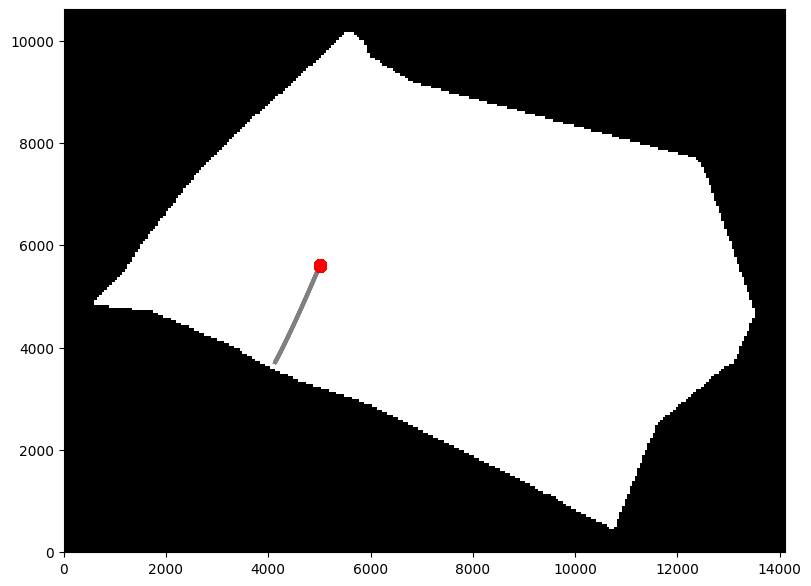

In [ ]:
import matplotlib as mpl
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1, aspect="equal")
mm = flopy.plot.PlotMapView(modelgrid=gwf.modelgrid, ax=ax)
# pmv = flopy.plot.PlotMapView(model = gwf, ax = ax, layer = 0)
# mm.plot_grid(ax = ax, color = ".5", alpha = 0.2) # 绘制网格
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
cmap = mpl.colors.ListedColormap(
    [
        "r",
        "g",
    ]
)
v = mm.plot_array(gwf.modelgrid.idomain, cmap=cmap, edgecolor="white")
mm.plot_pathline(p0, layer="all", color="blue", lw=0.75)
colors = ["green", "orange", "red","blue"]
for k in range(nlay):
    mm.plot_timeseries(ts0, layer=k, marker="o", lw=0, color=colors[k]);

# 绘制等值线
plot_contour_array = mm.contour_array(concentration[9,0], masked_values = [1e30], cmap = "brg", linestyles="--")
plt.clabel(plot_contour_array, fmt = r'%.2f') # 绘制等值线上文本标注
# plt.colorbar(plot_contour_array)              # 等值线图例

mm.plot_bc(package = gwf.get_package("WEL-1"), color = 'green')
mm.plot_inactive(ibound = gwf.modelgrid.idomain, color_noflow = 'black')



# 坐标系转换投影

In [ ]:
# pip install pyproj

In [ ]:
from pyproj import CRS
from pyproj import Transformer
def marcator(x,y):
    lonlat = {}
    # CGCS2000_3_Degree_GK_Zone_40 的wkid
    crs_CGCS2000 = CRS.from_epsg(4528)
    # crs_CGCS2000 = CRS.from_wkt('PROJCS["CGCS2000_3_Degree_GK_Zone_40",GEOGCS["GCS_China_Geodetic_Coordinate_System_2000",DATUM["D_China_2000",'
    #                             'SPHEROID["CGCS2000",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],'
    #                             'PROJECTION["Gauss_Kruger"],PARAMETER["False_Easting",40500000.0],PARAMETER["False_Northing",0.0],'
    #                             'PARAMETER["Central_Meridian",120.0],PARAMETER["Scale_Factor",1.0],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0],'
    #                             'AUTHORITY["EPSG",4528]]')
    #我们需要转换的目标坐标系的WKID
    crs_WGS84 = CRS.from_epsg(4326)
    from_crs = crs_CGCS2000
    to_crs = crs_WGS84
    transformer = Transformer.from_crs(from_crs, to_crs)
    # 即为转换后的坐标，也可以分别使⽤数组
    new_x, new_y = transformer.transform(x, y)
    lonlat['x'] = new_x
    lonlat['y'] = new_y
    return lonlat


In [ ]:
def marcator(x,y):
    lonlat = {}
    # CGCS2000_3_Degree_GK_Zone_40 的wkid
    crs_CGCS2000 = CRS.from_epsg(4528)
    # crs_CGCS2000 = CRS.from_wkt('PROJCS["CGCS2000_3_Degree_GK_Zone_40",GEOGCS["GCS_China_Geodetic_Coordinate_System_2000",DATUM["D_China_2000",'
    #                             'SPHEROID["CGCS2000",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],'
    #                             'PROJECTION["Gauss_Kruger"],PARAMETER["False_Easting",40500000.0],PARAMETER["False_Northing",0.0],'
    #                             'PARAMETER["Central_Meridian",120.0],PARAMETER["Scale_Factor",1.0],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0],'
    #                             'AUTHORITY["EPSG",4528]]')
    #我们需要转换的目标坐标系的WKID
    crs_WGS84 = CRS.from_epsg(4326)
    from_crs = crs_WGS84
    to_crs = crs_CGCS2000
    transformer = Transformer.from_crs(from_crs, to_crs)
    # 即为转换后的坐标，也可以分别使⽤数组
    new_x, new_y = transformer.transform(x, y)
    lonlat['x'] = new_x
    lonlat['y'] = new_y
    return lonlat
lonlat = marcator(121.028313,32.526987)
lonlat['x']


inf

In [ ]:
lonlat

In [ ]:
import math

In [ ]:
def LBH2XYZ(L: float, B: float, H: float, coorSys: str):
    """
    经纬高转地心XYZ
    :param L: 经度,单位°
    :param B: 纬度（地理纬度），单位°
    :param H: 高度，单位m
    :param coorSys 坐标系选择，参数可以为"wgs84"、"cgcs2000"，
    两种坐标系所采取的椭圆半长轴均为6378137m，扁率不同，
    wgs84的扁率为1/298.257223564，半短轴为6356752.314245251，偏心率e为0.08181919084248535
    cgcs2000的扁率为1/298.257222101，半短轴为6356752.314140356，偏心率e为0.08181919104281517
    :return: 地心XYZ 单位m
    """
    L = L / 180 * math.pi  # 先转为弧度
    B = B / 180 * math.pi  # 先转为弧度

    a = 6378137  # 半长轴
    if coorSys == "wgs84":
        e = 0.08181919084248535
    elif coorSys == "cgcs2000":
        e = 0.08181919104281517
    N = a / math.sqrt(1 - math.pow(e, 2) * math.pow(math.sin(B), 2))

    X = (N + H) * math.cos(B) * math.cos(L)
    Y = (N + H) * math.cos(B) * math.sin(L)
    Z = (N * (1 - math.pow(e, 2)) + H) * math.sin(B)

    return X, Y, Z

def XYZ2LBH(X: float, Y: float, Z: float, coorSys: str):
    """
    地心非惯性坐标系（地固系）XYZ转换为LBH
    :param X: X轴刻度值，单位m
    :param Y: Y轴刻度值，单位m
    :param Z: Z轴刻度值，单位m
    :param coorSys: 坐标系选择，参数可以为"wgs84"、"cgcs2000"，
    :return: LBH  单位°、m
    """

    a = 6378137  # 半长轴
    if coorSys == "wgs84":
        e = 0.08181919084248535
    elif coorSys == "cgcs2000":
        e = 0.08181919104281517

    L = math.atan(Y / X) / math.pi * 180

    tB = 0

    N = a / math.sqrt(1 - math.pow(e, 2) * math.pow(math.sin(tB), 2))

    B = math.atan((Z + N * math.pow(e, 2) * math.sin(tB)) / math.sqrt(X * X + Y * Y))

    while B - tB > 0.00000001:
        tB = B
        N = a / math.sqrt(1 - math.pow(e, 2) * math.pow(math.sin(tB), 2))
        B = math.atan((Z + N * math.pow(e, 2) * math.sin(tB)) / math.sqrt(X * X + Y * Y))

    H = Z / math.sin(B) - N * (1 - e * e)
    B = B / math.pi * 180

    return L, B, H

X, Y, Z = LBH2XYZ(121.028313,32.526987,0,"wgs84")
L, B, H = LBH2XYZ(498149,3604810,0,"cgcs2000")

In [ ]:
print(X, Y, Z)

-2774659.168549471 4612643.718194664 3409846.8463238534


## 这个代码貌似可以跑

对应的网格坐标: 504590 3603118
对应的WGS坐标: 120.981464 32.567225


/home/nandahgy/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/nandahgy/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_1255/4273154816.py:24: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_prj, y_prj = transfor

In [ ]:
!sudo chmod -R 777 /home/nandahgy/geotransform

[sudo] password for nandahgy: 


## Github上抄了/home/nandahgy/geotransform

In [ ]:
# -*- encoding: utf-8 -*-
"""
中国常用大地测量（投影）坐标系转换（标准转换，不涉及使用7参数平移、旋转、缩放）。
主要有wgs84、西安80、北京54、新北京、cgcs2000等我国常用坐标系之间的相互转换。
本模块是对 pyproj 中的相关方法进行了二次封装，以方便使用！采用epsg中记录的各个坐标系参数
pyproj 官方文档：http://pyproj4.github.io/pyproj/stable/
note：pyproj 通过 crs 生成transformer 是非常耗时的操作，经测试
    AMD Ryzen 5 2500U with Radeon Vega Mobile G方向 2.00GHz平台，
    创建一个需要0.2~0.3秒。在批量转换的任务中，如果对每个点生成一个transformer，效率是不能接受的！
    考虑到，一个确定的转换任务中，需要重新生成transformer的地方在：输入点位于不同投影分度带。
    这里采用的策略是借助单例设计模式的思想，在批量转换的时候，先获取某个点转换的特征：
        1、输入坐标projection
        2、输入坐标中央经线
        3、输入坐标是否带有分度带带号
        4、输出坐标的projection
        5、输出坐标中央经线
        6、输出坐标是否带有分度带带号
    根据这些特征可以唯一的描述一个transformer，可以根据这些特征，生成一个transformer_key，
    用transformer_key作为键将transformer对象保存至字典中，在生成transformer之前检查拥有此特征的transformer是否已经生成，
    如果已经生成则直接返回，如果未生成，则生成。
    因为每次批量转换的任务所涉及的范围一般不会跨几个分度带，因此不会生成特别多的transformer，所以空间占用和
    整体的时间效率都能接受。
"""
from pyproj import Transformer, CRS
    
    
class Epsg(object):
    """
    获取CRS（coordinate reference system）
    类方法的名称有特殊含义，后续计算需要用到方法名。
    所有获取CRS的类方法均有以下两个参数，其中当CRS为经纬度坐标时，这两个参数仅为占位参数，
    不起任何作用，只是为了参数统一方便回调：
        lng：float 坐标经度或者坐标点所在分度带的中央经线值（用来确定坐标点所在分度带号，以返回正确的CRS）
        with_zone：指定坐标是否带有所在分度带的带号，默认为False（True：带有带号，False：不带）
    """
    @staticmethod
    def crs(epsg_code, index=None, lng_0=None):
        crs = CRS.from_epsg(epsg_code)
        crs.index = index
        crs.lng_0 = lng_0
        return crs

    @staticmethod
    def calc_number(lng, zone_degree):
        return int(lng / zone_degree + zone_degree / 6)  # 带号

    @classmethod
    def calc_number_lng0(cls, lng, zone_degree):
        number = cls.calc_number(lng, zone_degree)
        return number, (number - 1) * zone_degree + 3  # （带号，中央经度）

    @classmethod
    def __gauss_base(cls, lng, zone_degree, code, with_zone_code, with_zone=False):
        number, lng_0 = cls.calc_number_lng0(lng, zone_degree)
        i = number - int(75 / zone_degree + zone_degree / 6)
        if lng_0 - zone_degree / 2 <= lng < lng_0 + zone_degree / 2:
            if with_zone:
                epsg = i + with_zone_code
            else:
                epsg = i + code
            return cls.crs(epsg, number, lng_0)
        raise ValueError('lng 取值范围为：73.5~136.5')

    @classmethod
    def wgs84(cls, *args, **kwargs):
        return cls.crs(4326)

    @classmethod
    def wgs84_3d(cls, *args, **kwargs):
        return cls.crs(4979)

    @classmethod
    def xian80(cls, *args, **kwargs):
        return cls.crs(4610)

    @classmethod
    def bj_new(cls, *args, **kwargs):
        return cls.crs(4555)

    @classmethod
    def cgcs2000(cls, *args, **kwargs):
        # return cls.crs(4490)
        return cls.crs(4528)

    @classmethod
    def xian80_gauss_3(cls, lng, with_zone=False):
        return cls.__gauss_base(lng, 3, 2370, 2349, with_zone)

    @classmethod
    def xian80_gauss_6(cls, lng, with_zone=False):
        return cls.__gauss_base(lng, 6, 2338, 2327, with_zone)

    @classmethod
    def bj54_gauss_3(cls, lng, with_zone=False):
        return cls.__gauss_base(lng, 3, 2422, 2401, with_zone)

    @classmethod
    def bj_new_gauss_3(cls, lng, with_zone=False):
        zone_degree = 3
        number = int(lng / zone_degree + zone_degree / 6)  # 带号
        lng_0 = (number - 1) * zone_degree + 3  # 中央经度
        i = number - int(75 / zone_degree + zone_degree / 6)
        if lng_0 - zone_degree / 2 <= lng < lng_0 + zone_degree / 2:
            if with_zone:
                if lng_0 <= 87:
                    epsg = i + 4652
                else:
                    epsg = i + 4761
            else:
                if lng_0 <= 129:
                    epsg = i + 4782
                elif lng_0 == 132:
                    epsg = 4812
                else:
                    epsg = 4822
            return cls.crs(epsg, number, lng_0)
        raise ValueError('lng 取值范围为：73.5~136.5')

    @classmethod
    def bj_new_gauss_6(cls, lng, with_zone=False):
        return cls.__gauss_base(lng, 6, 4579, 4568, with_zone)

    @classmethod
    def cgcs2000_gauss_3(cls, lng, with_zone=False):
        return cls.__gauss_base(lng, 3, 4534, 4513, with_zone)

    @classmethod
    def cgcs2000_gauss_6(cls, lng, with_zone=False):
        return cls.__gauss_base(lng, 6, 4502, 4491, with_zone)


class TransProj(object):
    """经纬坐标转换为其他坐标"""
    epsg = Epsg

    def __init__(self,
        exist_proj=None, exist_lng0=None, exist_with_zone=False,
        target_proj=None, target_lng0=None, target_with_zone=False,
        transformer=None
    ):
        """
        :param exist_proj: function 获取原有坐标坐标系 epsg 代码的回调函数（Epsg类方法）
        :param exist_lng0: float 输入坐标点的中央经线经度值，不指定此值，将根据输入的值自动计算。
                            当输入坐标为投影坐标并且不带分度带带号时，必须指定此值！
        :param exist_with_zone: Boolean 输入坐标是否带有分度带的带号
        :param target_proj: function 获取目标坐标坐标系 epsg 代码的回调函数（Epsg类方法）
        :param target_lng0: float 输出坐标点的中央经线经度值，不指定此值，将根据输入的值自动计算。
                            注意！！！
                            保险起见，在转换经度跨度不大的批量转换时建议均指定此值，因为在批量计算中，由于点集可能位于分度带
                            的中央经线周围，中央经线的自动计算是严格按照分度带的规定计算的，在输出投影坐标不加带号的情况下，
                            转换后的坐标可能分不清位于哪个分度带内，导致转换后坐标点使用麻烦（某些点可能会偏移一个分度带，
                            还需找出这些点重新指定分度带，再解算回去），因此为了统一，建议在一次批量转换过程中指定中央经线
                            并记录此值。
        :param target_with_zone: Boolean 输出坐标是否带有分度带的带号
        :param transformer: obj pyproj.transformer.Transformer 自定义的转换器。
                            当此参数赋值时，前面所有的参数将不起作用，因为前面所有参数是用来创建转换器用的
        """
        self.exist_proj = exist_proj
        self.exist_with_zone = exist_with_zone
        self.exist_lng0 = exist_lng0
        self.target_proj = target_proj
        self.target_with_zone = target_with_zone
        self.target_lng0 = target_lng0
        self._transformer = transformer
        if exist_proj is None and transformer is None:
            self.transformer = Transformer.from_pipeline('proj=noop ellps=GRS80')
        # 保存已经存在的转换器
        self.transformers = {}

    def transformer(self, coordinate):
        """
        创建坐标转换的 transformer
        :param coordinate: list or tuple 坐标
        :return: obj pyproj.transformer.Transformer 对象。
        """
        lng = coordinate[0]
        if self._transformer:
            return self._transformer

        exist_proj_name = getattr(self.exist_proj, '__name__')
        target_proj_name = getattr(self.target_proj, '__name__')
        exist_zone_degree = None
        target_zone_degree = None

        try:
            exist_zone_degree = int(exist_proj_name.split('_')[-1])
        except Exception:
            pass

        try:
            target_zone_degree = int(target_proj_name.split('_')[-1])
        except Exception:
            pass

        # 确定输入坐标的中央经度，当创建对象的时候指定了中央经线，则使用指定的
        if self.exist_lng0:
            try:
                exist_lng0 = float(self.exist_lng0)
            except Exception:
                raise TypeError('指定输入中央经线经度值错误！')
        else:
            if exist_zone_degree:
                # 说明输入的是投影坐标
                if self.exist_with_zone:
                    number = int(lng / 1000000)
                    exist_lng0 = (number - 1) * exist_zone_degree + 3
                else:
                    raise TypeError('当原有坐标不是经纬度坐标并且输入投影坐标X方向没有带号时，创建对象时必须指定正确的中央经线经度值！')
            else:
                # 说明输入的是经纬度坐标
                exist_lng0 = lng

        # 确定输出坐标的中央经度,当没有指定的时候，使用输入的
        if self.target_lng0:
            try:
                target_lng0 = float(self.target_lng0)
            except Exception:
                raise TypeError('指定输出中央经线经度值错误！')
        else:
            target_lng0 = exist_lng0

        # 格式化中央经度 ，以获得每个分度带内的 transformer_key
        if exist_zone_degree:
            exist_lng0 = Epsg.calc_number_lng0(exist_lng0, exist_zone_degree)[-1]
        else:
            exist_lng0 = None

        if target_zone_degree:
            target_lng0 = Epsg.calc_number_lng0(target_lng0, target_zone_degree)[-1]
        else:
            target_lng0 = None

        transformer_key = "{}/{}/{}/{}/{}/{}".format(
            exist_proj_name, str(exist_lng0), str(self.exist_with_zone),
            target_proj_name, str(target_lng0), str(self.target_with_zone),
        )

        if transformer_key in self.transformers:
            return self.transformers[transformer_key]

        # 生成transformer
        transformer = Transformer.from_crs(
            self.exist_proj(exist_lng0, self.exist_with_zone),
            self.target_proj(target_lng0, self.target_with_zone),
            always_xy=True
        )
        # print('生成trans：', transformer_key)
        self.transformers[transformer_key] = transformer
        return transformer

    def __call__(self, coordinate, *args, **kwargs):
        transformer = self.transformer(coordinate)
        # print(transformer.definition)
        return transformer.transform(*coordinate)


if __name__ == '__main__':
    import time

    with open('/home/nandahgy/geotransform/test.csv') as fp:
        data = fp.read()
    coords = [tuple(map(lambda _: float(_), x.split(','))) for x in data.split('\n') if x]

    start_time = time.time()
    trans = TransProj(exist_proj=Epsg.wgs84_3d, target_proj=Epsg.xian80_gauss_3, exist_lng0=114, target_with_zone=True)
    new_coords = []
    for coord in coords:
        new_coord = trans(coord)
        new_coords.append(new_coord)

    print('转换点数：%d，耗时：%.3fS' % (len(new_coords), time.time() - start_time))
    print("生成 transformer 个数：%d" % len(trans.transformers))
    for t in trans.transformers.values():
        print('\t', t.description)

    with open('/home/nandahgy/geotransform/test_result.csv', 'w') as f:
        for x in new_coords:
            f.write('%.3f,%.3f,%.3f\n' % tuple(x))

转换点数：202，耗时：0.114S
生成 transformer 个数：1
	 axis order change (2D) + Ballpark geographic offset from WGS 84 to Xian 1980 + 3-degree Gauss-Kruger zone 38 + axis order change (2D)


在地图上找了一个点

In [ ]:
coords = [(121.028313,32.526987)]
trans = TransProj(exist_proj=Epsg.wgs84_3d, target_proj=Epsg.cgcs2000, exist_lng0=120, target_with_zone=True)
# 计算公式为6度带带号=（经度+6°）/6取整，
# 6度带中央经线=（6度带带号*6）-3，
# 3度带带号=（经度+1.5°）/3取整，
# 3度带中央经线=3度带带号*3。
# 6度带中央经线经度的计算：
# 当地中央经线经度=6°×当地带号-3°如地形图上横坐标为20345532，
# 其所处的6度带的中央经线经度为：6°×20-3°=117°。
new_coords = []
for coord in coords:
      new_coord = trans(coord)
      new_coords.append(new_coord)
      
print("生成 transformer 个数：%d" % len(trans.transformers))
print("new_coords:", new_coords)
for t in trans.transformers.values():
      print('\t', t.description)

生成 transformer 个数：1
new_coords: [(40596610.85910711, 3600756.9702698416)]
	 axis order change (2D) + Ballpark geographic offset from WGS 84 to China Geodetic Coordinate System 2000 + 3-degree Gauss-Kruger zone 40 + axis order change (2D)


In [ ]:
coords = [(40596610.85910711, 3604810.9702698416)]
trans = TransProj(exist_proj=Epsg.cgcs2000, target_proj=Epsg.wgs84_3d, exist_lng0=120, target_with_zone=True)
# 计算公式为6度带带号=（经度+6°）/6取整，
# 6度带中央经线=（6度带带号*6）-3，
# 3度带带号=（经度+1.5°）/3取整，
# 3度带中央经线=3度带带号*3。
# 6度带中央经线经度的计算：
# 当地中央经线经度=6°×当地带号-3°如地形图上横坐标为20345532，
# 其所处的6度带的中央经线经度为：6°×20-3°=117°。
new_coords = []
for coord in coords:
      new_coord = trans(coord)
      new_coords.append(new_coord)
      
print("生成 transformer 个数：%d" % len(trans.transformers))
print("new_coords:", new_coords)
for t in trans.transformers.values():
      print('\t', t.description)

生成 transformer 个数：1
new_coords: [(121.02872977647992, 32.563537733494634)]
	 axis order change (2D) + Inverse of 3-degree Gauss-Kruger zone 40 + Ballpark geographic offset from China Geodetic Coordinate System 2000 to WGS 84 + axis order change (2D)
